<a href="https://colab.research.google.com/github/shahabas123/Online_shopper_purchase_prediction_project/blob/main/Project1_online_shopper_purchasing_intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Objective
The goal is to predict whether a visitor to an online shopping website will make a purchase based on their behavior, such as time spent on the site, pages visited, and type of device used.


IMPORTING ALL REQUIRED PACKAGES

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,accuracy_score,RocCurveDisplay
from sklearn.model_selection import GridSearchCV
import pickle

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
df.isna().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [ ]:
df.dtypes

,0
Administrative,int64
Administrative_Duration,float64
Informational,int64
Informational_Duration,float64
ProductRelated,int64
ProductRelated_Duration,float64
BounceRates,float64
ExitRates,float64
PageValues,float64
SpecialDay,float64


**DATA CLEANING**

In [ ]:
df['Month'].value_counts()

,count
Month,
May,3364
Nov,2998
Mar,1907
Dec,1727
Oct,549
Sep,448
Aug,433
Jul,432
June,288


In [ ]:
df['VisitorType'].value_counts()

,count
VisitorType,
Returning_Visitor,10551
New_Visitor,1694
Other,85


In [ ]:
df['Weekend'].value_counts()

,count
Weekend,
False,9462
True,2868


In [ ]:
df['Revenue'].value_counts()

,count
Revenue,
False,10422
True,1908


using One-Hot Encoding for Month and visitor_type

In [ ]:
data=df[['Month','VisitorType']]
ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
ohe_transform=ohe.fit_transform(data)
ohe_transform

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.drop(['Month','VisitorType'],axis=1,inplace=True)

In [ ]:
df=pd.concat([df,ohe_transform],axis=1)
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.isna().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


mapping weekend and revenue

In [ ]:
# df['Weekend'] = df['Weekend'].map({'False': 0, 'True': 1})
# df['Revenue'] = df['Revenue'].map({'False': 0, 'True': 1})

In [ ]:
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

In [ ]:
df.dtypes

,0
Administrative,int64
Administrative_Duration,float64
Informational,int64
Informational_Duration,float64
ProductRelated,int64
ProductRelated_Duration,float64
BounceRates,float64
ExitRates,float64
PageValues,float64
SpecialDay,float64


In [ ]:
df['Weekend'].unique()

array([0, 1])

In [ ]:
df['Revenue']

,Revenue
0,0
1,0
2,0
3,0
4,0
...,...
12325,0
12326,0
12327,0
12328,0


checking and dropping duplicates

In [ ]:
duplicate_rows=df.duplicated()
num=duplicate_rows.sum()
print(num)

125


In [ ]:
duplicate_rows_df=df[duplicate_rows]
print(duplicate_rows_df)

       Administrative  Administrative_Duration  Informational  \
158                 0                      0.0              0   
159                 0                      0.0              0   
178                 0                      0.0              0   
418                 0                      0.0              0   
456                 0                      0.0              0   
...               ...                      ...            ...   
11934               0                      0.0              0   
11938               0                      0.0              0   
12159               0                      0.0              0   
12180               0                      0.0              0   
12185               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
158                       0.0               1                      0.0   
159                       0.0               1                      0.0 

In [ ]:
df.drop_duplicates(inplace=True)

revenue=1

In [ ]:
df.loc[df['Revenue']==1]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
65,3,87.833333,0,0.00,27,798.333333,0.000000,0.012644,22.916036,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
76,10,1005.666667,0,0.00,36,2111.341667,0.004348,0.014493,11.439412,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
101,4,61.000000,0,0.00,19,607.000000,0.000000,0.026984,17.535959,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
188,9,111.500000,1,48.50,49,1868.819697,0.000000,0.020709,1.706015,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
196,2,56.000000,1,144.00,67,2563.783333,0.000000,0.005797,19.342650,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272,6,133.466667,0,0.00,44,2664.445833,0.002041,0.010884,97.860836,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12276,7,139.575000,0,0.00,30,986.500000,0.000000,0.011429,36.392861,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12311,1,0.000000,2,211.25,144,4627.489571,0.001361,0.020664,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12312,7,150.357143,1,9.00,221,11431.001240,0.011149,0.021904,1.582473,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


**EDA:**

REVENUE CHART

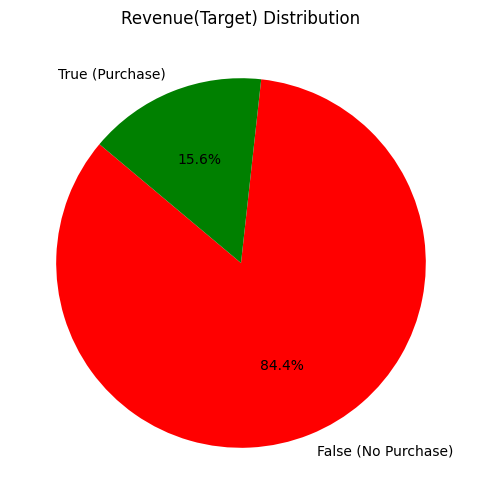

In [ ]:
revenue_counts=df['Revenue'].value_counts()
lables=['False (No Purchase)','True (Purchase)']
plt.figure(figsize=(6,6))
plt.pie(revenue_counts,labels=lables,colors=['red','green'],autopct='%1.1f%%',startangle=140)
plt.title('Revenue(Target) Distribution')
plt.show()

from piechart, it is visible that the dataset is highly imbalanced.



Heatmap on Product related Duration, Bounce Rates, Exit Rates, Page values and Revenue

<Axes: >

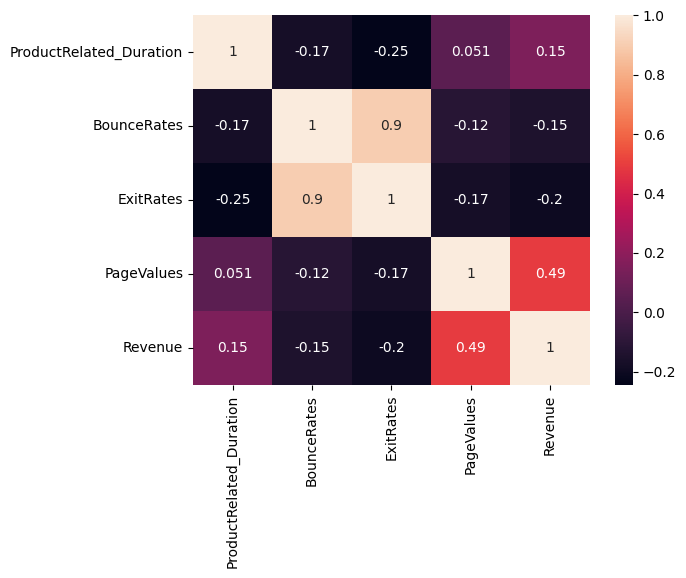

In [ ]:
df1=df[['ProductRelated_Duration','BounceRates','ExitRates','PageValues','Revenue']]
sns.heatmap(df1.corr(),annot=True)

1.The value of pages visited has highest corelation with Revenue.

2.Bounce Rates(lack of engagement) and Exit Rates(lower purchase intent) has negative corelation with Revenue indicating lower the Bounce Rates and Exit Rates, higher the Revenue.

3.Product Related Duration is the time spent on product pages, and ith has positive correlation with Revenue.

4.High correlation between Bounce Rates and Exit Rates indicating simultaneous occcurence.

Jointplot of Bounce Rates ane Exit rates

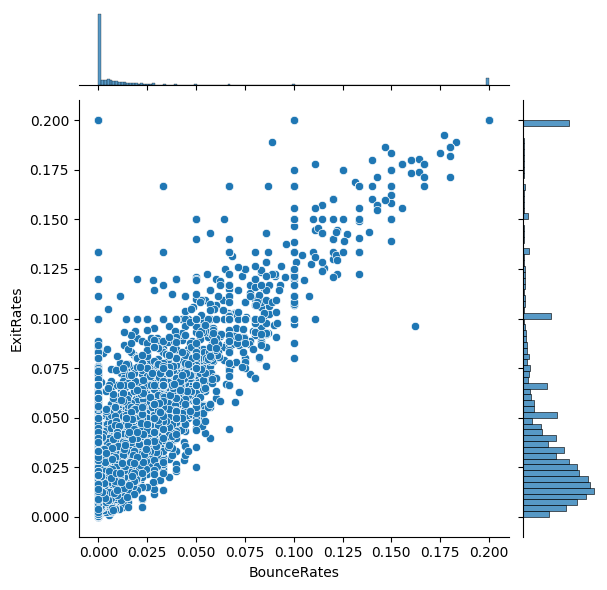

In [ ]:
sns.jointplot(x='BounceRates',y='ExitRates',data=df)

1. A high bounce rate also corresponds to high exit rates.

2. More number of points at lower Bounce Rates and Exit Rates indicate more engagement of people to explore more number of pages.

Countplot of product related pages

<Axes: xlabel='ProductRelated', ylabel='count'>

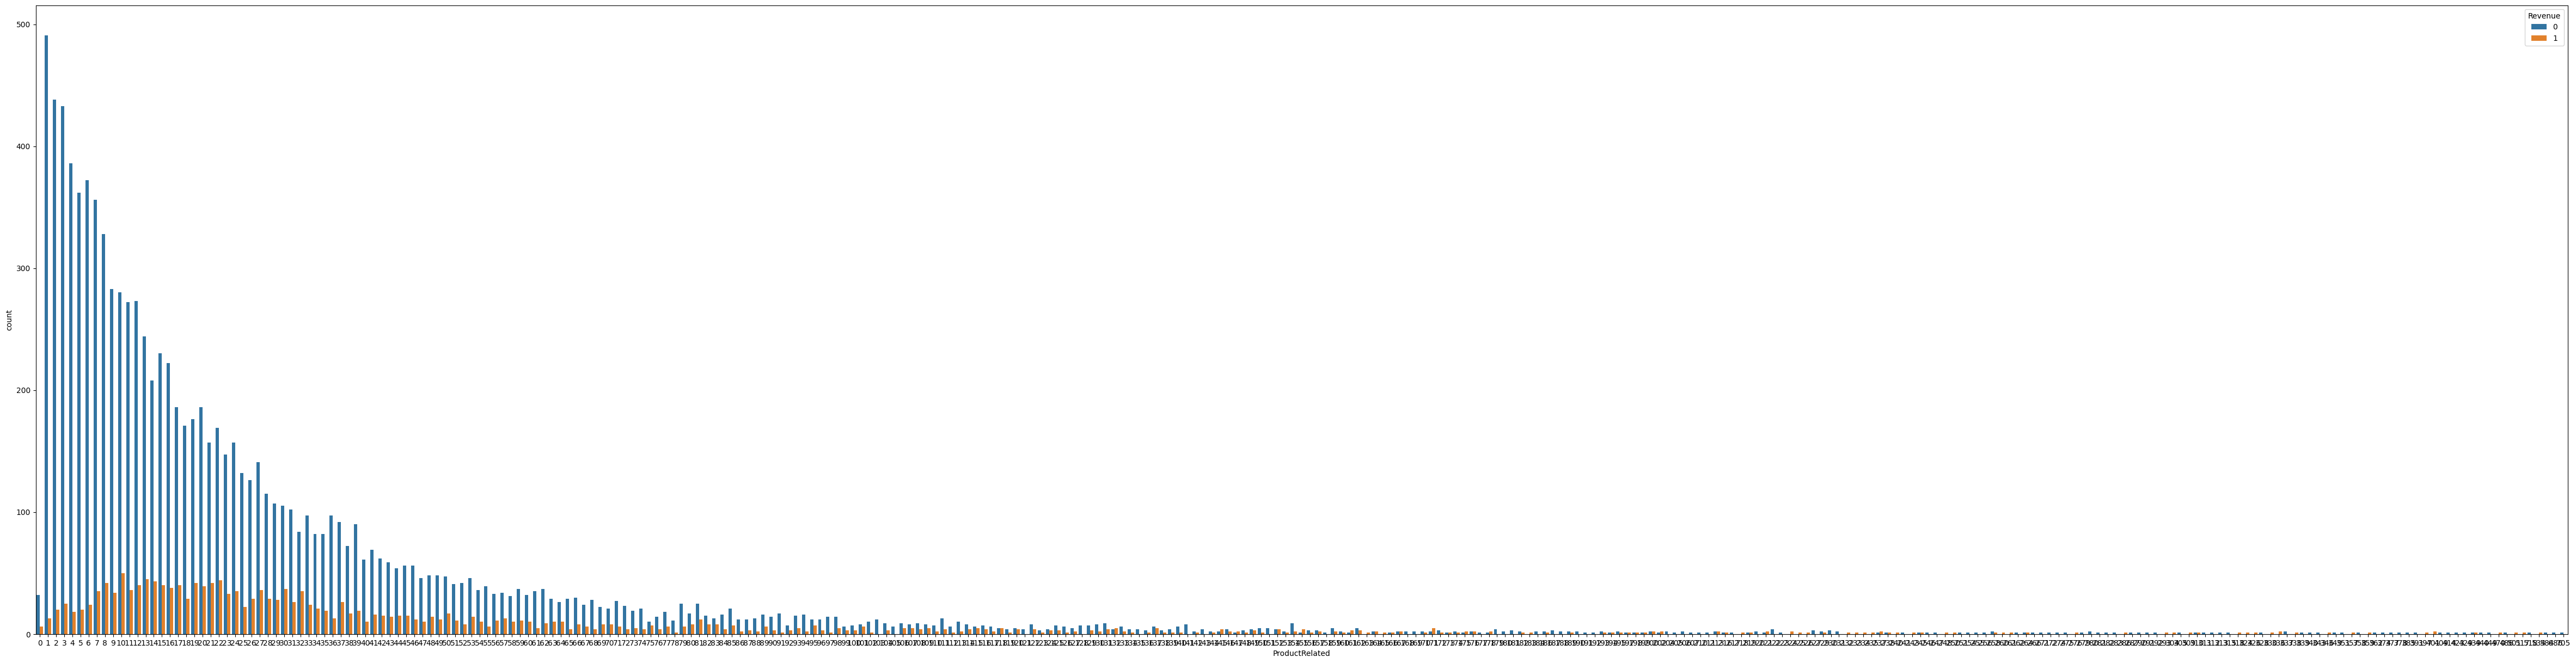

In [ ]:
plt.figure(figsize=(60,15))
sns.countplot(x='ProductRelated',data=df,hue='Revenue')

Customers which visits pages in the range 7-18 contributes highest toward buying the product.

Customers which visit 1 to 2 pages does not contribute significantly towards buying the product.

Barplot on Special Day and its impact on Revenue

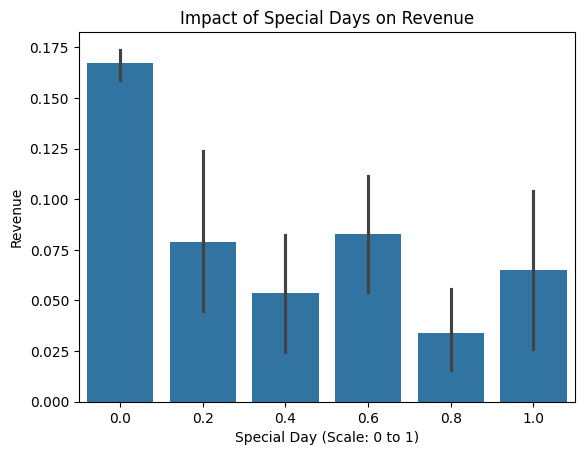

In [ ]:
sns.barplot(x='SpecialDay',y='Revenue',data=df)
plt.xlabel("Special Day (Scale: 0 to 1)")
plt.ylabel("Revenue")
plt.title("Impact of Special Days on Revenue")
plt.show()

1. Special Days have less significant Impact on purchase of products.

2. More marketing has to be done on Special Days to boost sales.

Boxplot on Traffic Type To know how customers land on website

<Axes: xlabel='TrafficType', ylabel='Revenue'>

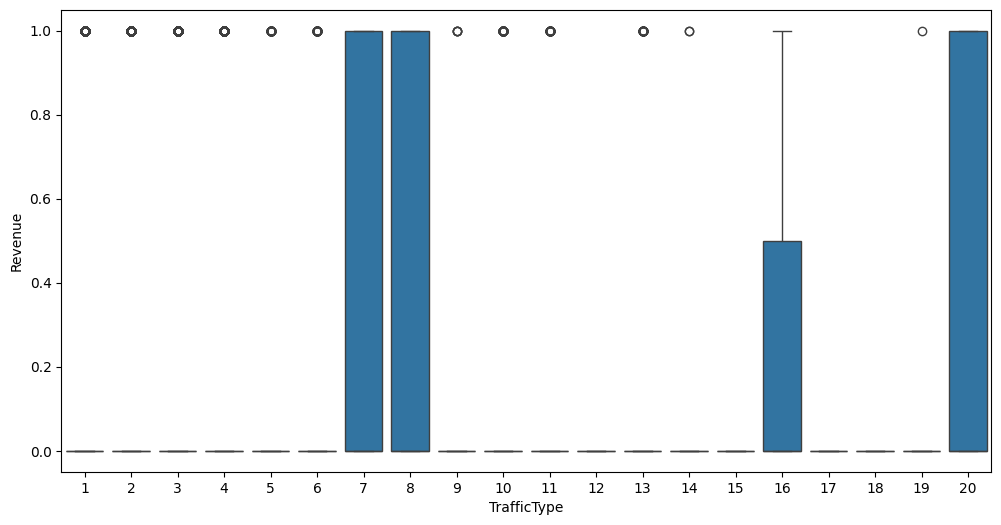

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='TrafficType',y='Revenue',data=df)

1. Higher IQR=(inter-quartile range) for Traffic Type 7,8 and 20, indicating Revenue fluctuates a lot due to inconsistent purchase behaviour.

This also indicates these types are organic buyers which maybe casual buyers or Serious ones, also can indicate High spending and low spending users.

2. Small IQR means Revenue from these types of traffic is small but consistent.

Pie chart on Distribution of Visitors

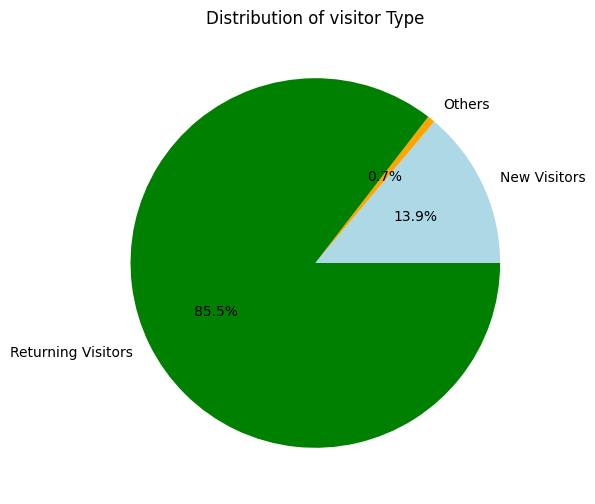

In [ ]:
visitor_counts=df[['VisitorType_New_Visitor','VisitorType_Other','VisitorType_Returning_Visitor']].sum()
lables=['New Visitors','Others','Returning Visitors']
plt.figure(figsize=(6,6))
plt.pie(visitor_counts,labels=lables,autopct='%1.1f%%',colors=['lightblue','orange','green'])
plt.title("Distribution of visitor Type")
plt.show()


To check for outliers

In [ ]:
def count_outliers(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['number']).columns:  # Only for numeric features
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    return outlier_counts

# Get the count of outliers for each feature
outlier_summary = count_outliers(df)

# Print results
# for feature, count in outlier_summary.items():
#     print(f"Feature: {feature}, Outliers: {count}")

# Convert to DataFrame
outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Feature', 'Outliers'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Feature', y='Outliers', data=outlier_df, palette='viridis')

# Aesthetics
plt.xticks(rotation=90)  # Rotate x labels for readability
plt.xlabel("Features")
plt.ylabel("Number of Outliers")
plt.title("Outliers Count per Feature")
plt.show()

NameError: name 'df' is not defined

High number of outliers in dataset

To check skewness of data

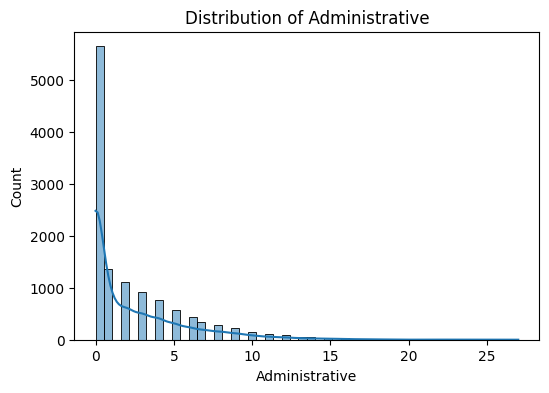

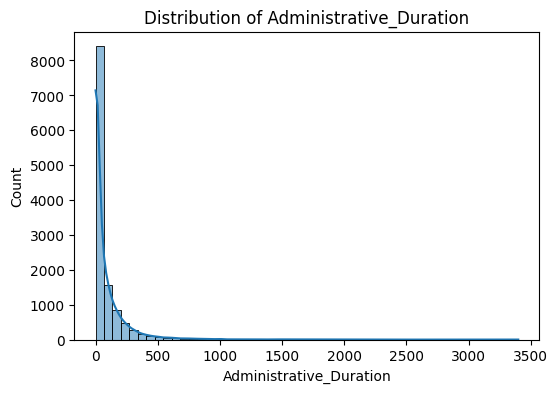

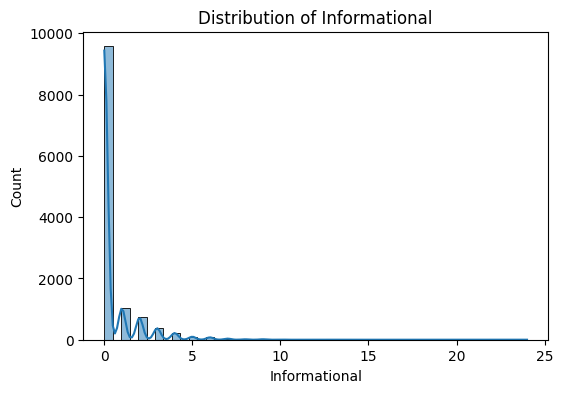

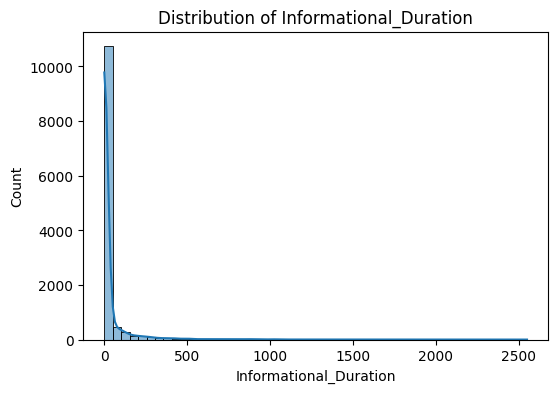

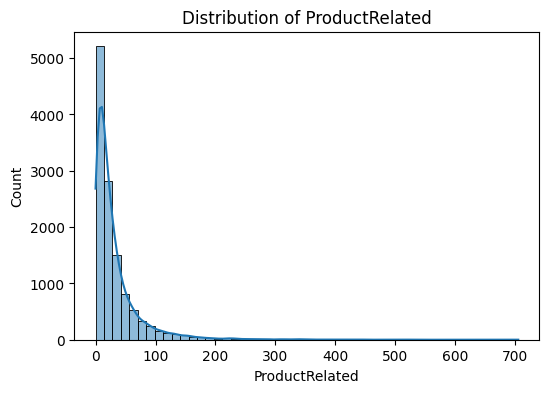

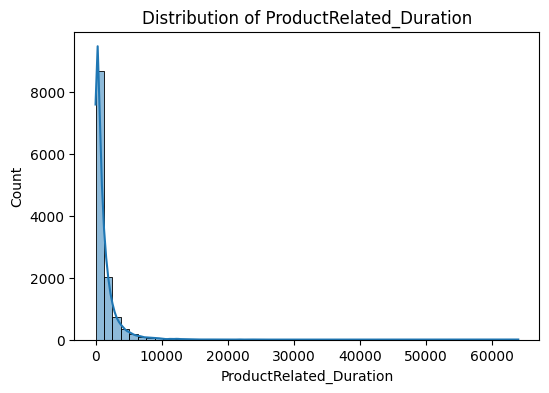

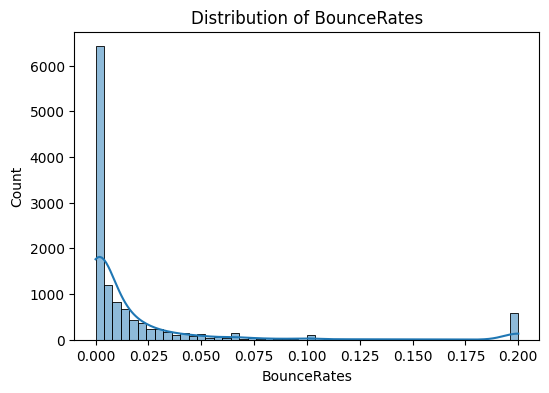

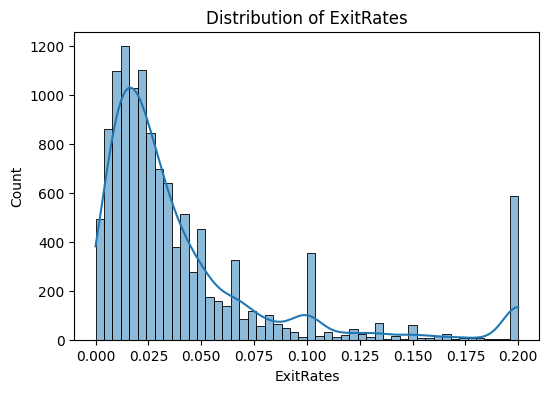

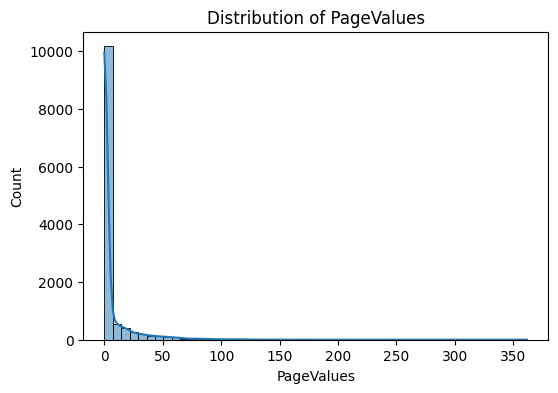

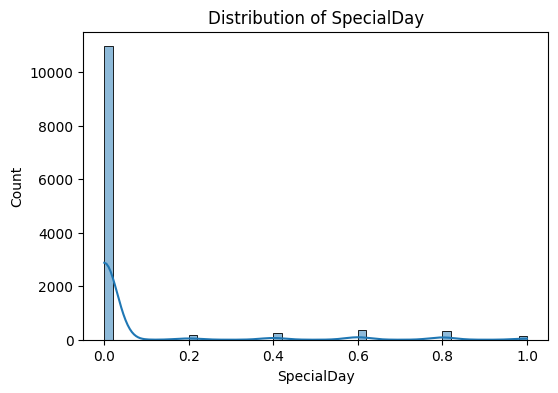

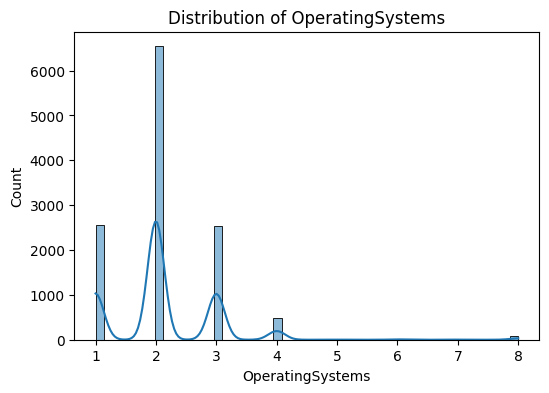

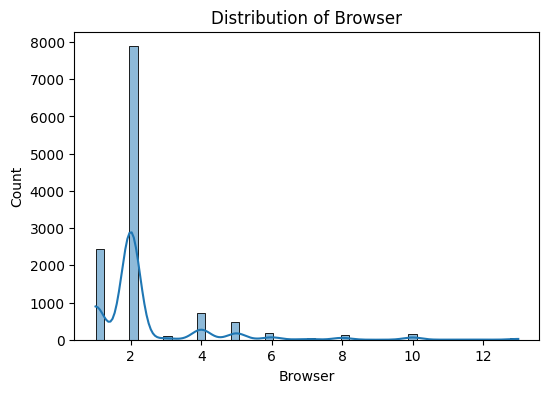

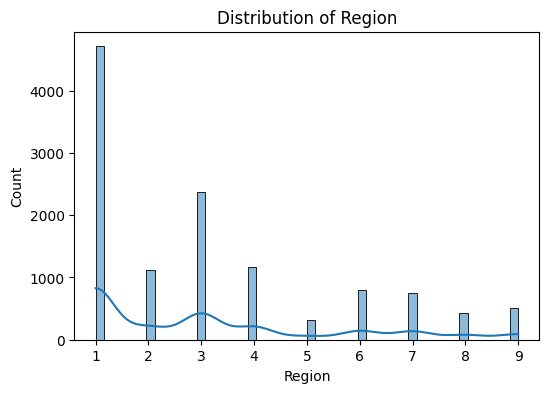

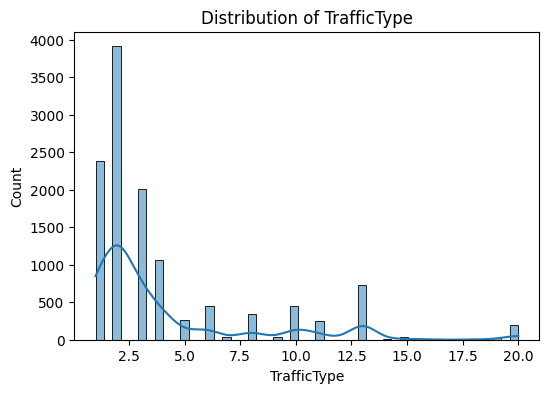

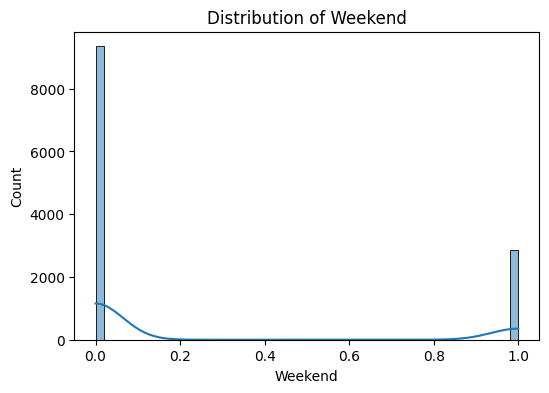

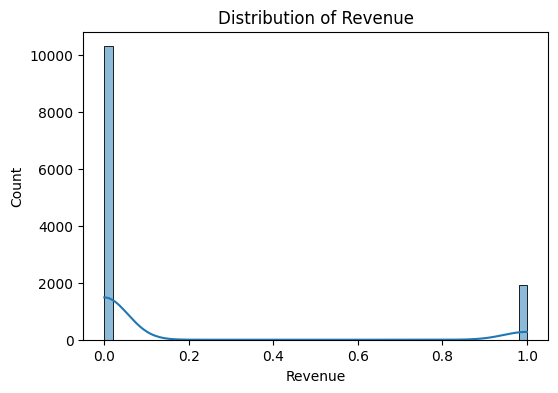

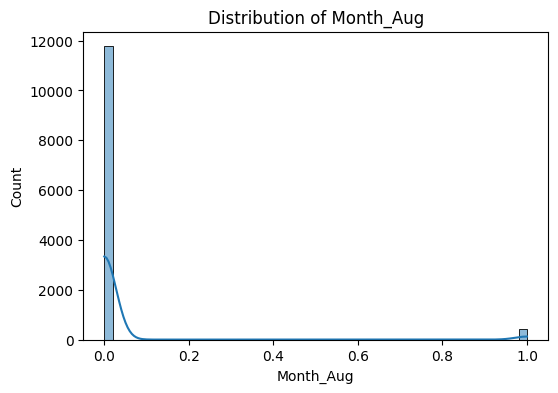

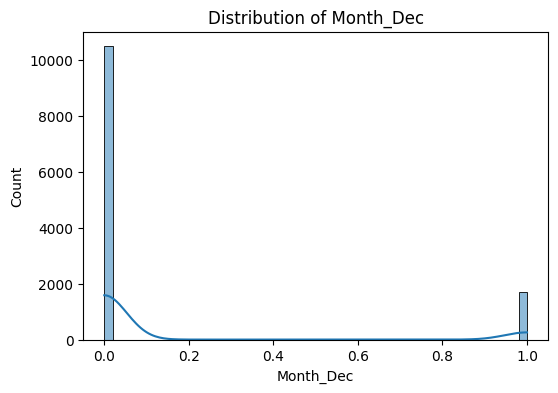

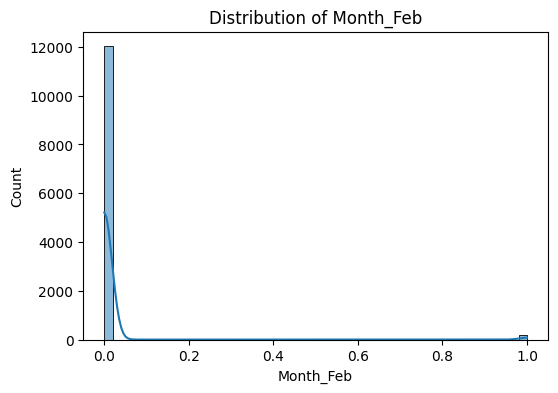

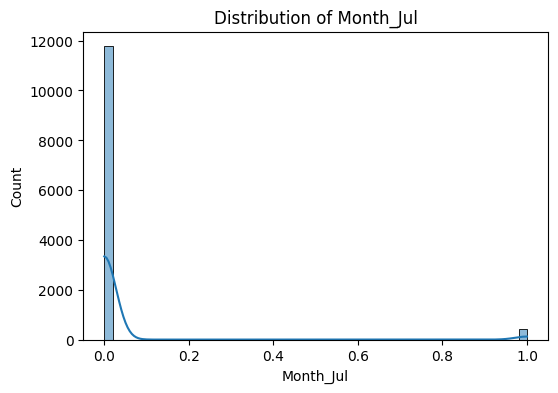

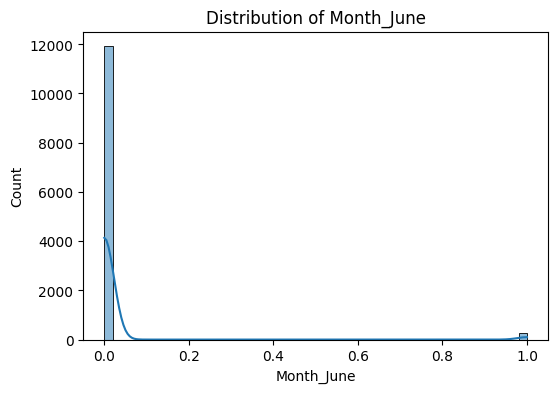

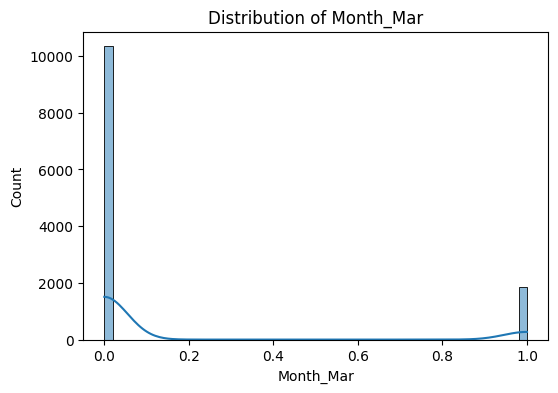

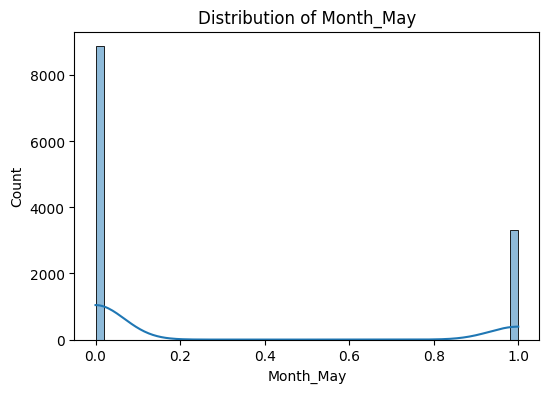

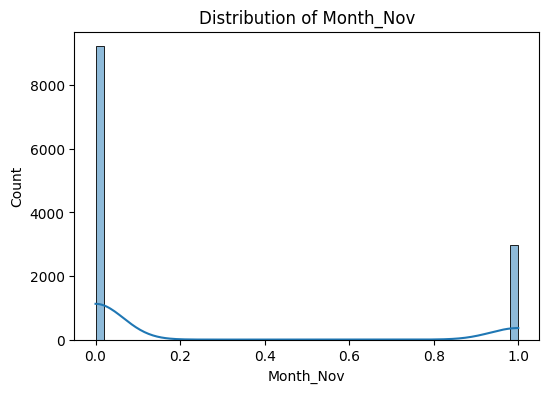

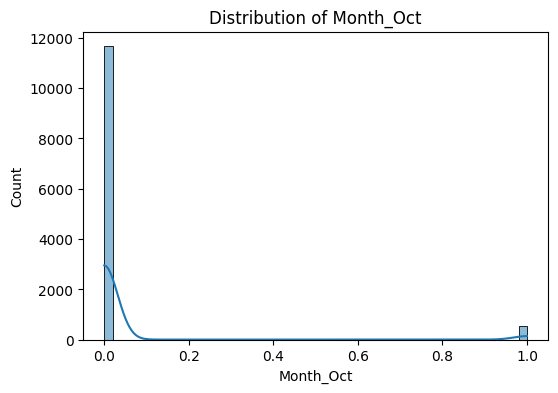

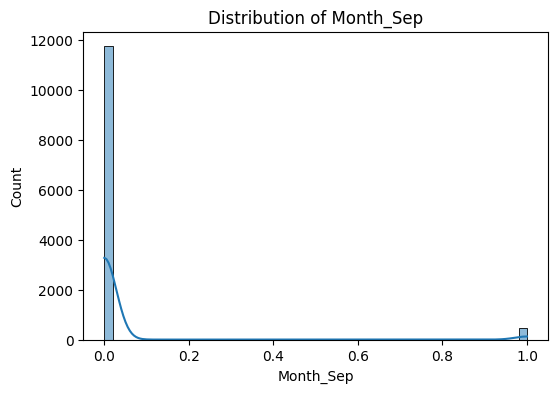

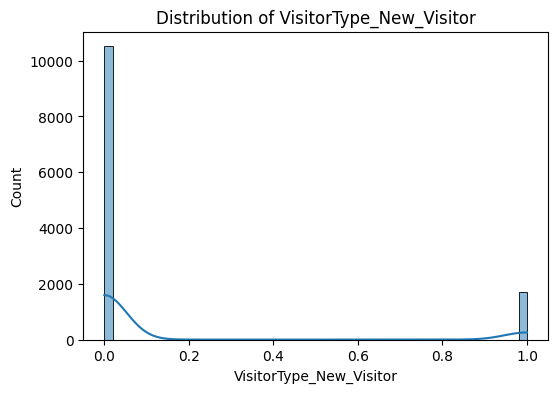

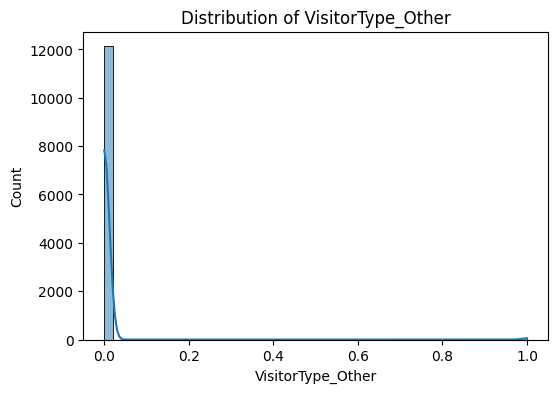

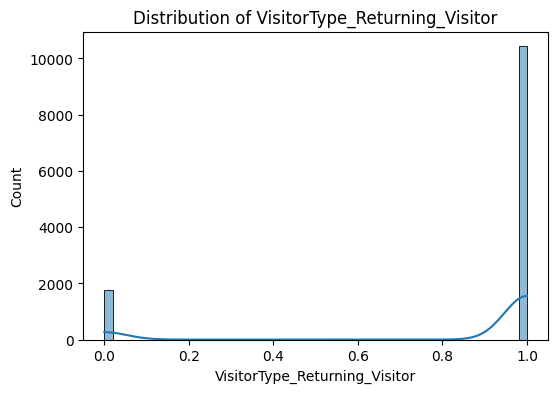

In [ ]:
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

Features in dataset is highly right skewed except for returning visitors(left skewed).

A skewed distribution is normal for a real-word dataset where some points can lie at extreme ends.


Log Transformation for features with highly skewed data

In [ ]:
df['Administrative_Duration'] = np.log1p(df['Administrative_Duration'])
df['Informational'] = np.log1p(df['Informational'])
df['Informational_Duration'] = np.log1p(df['Informational_Duration'])
df['ProductRelated_Duration'] = np.log1p(df['ProductRelated_Duration'])
df['PageValues'] = np.log1p(df['PageValues'])
df['Month_Aug'] = np.log1p(df['Month_Aug'])
df['Month_Feb'] = np.log1p(df['Month_Feb'])
df['Month_Jul'] = np.log1p(df['Month_Jul'])
df['Month_June'] = np.log1p(df['Month_June'])
df['Month_Sep'] = np.log1p(df['Month_Sep'])
df['VisitorType_Other'] = np.log1p(df['VisitorType_Other'])

In [ ]:
X=df.drop(['Revenue'],axis=1)
X


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.000000,0.0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.000000,0.0,0.0,2,4.174387,0.000000,0.100000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.000000,0.0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0.000000,0.0,0.0,2,1.299283,0.050000,0.140000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.000000,0.0,0.0,10,6.443336,0.020000,0.050000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,4.983607,0.0,0.0,53,7.487057,0.007143,0.029031,2.583372,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12326,0,0.000000,0.0,0.0,5,6.145794,0.000000,0.021333,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12327,0,0.000000,0.0,0.0,6,5.221706,0.083333,0.086667,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12328,4,4.330733,0.0,0.0,15,5.849325,0.000000,0.021053,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
y=df.iloc[:,15:16]
y

,Revenue
0,0
1,0
2,0
3,0
4,0
...,...
12325,0
12326,0
12327,0
12328,0


**SCALING**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.14814815, 0.53259007, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

**SPLITTING DATA INTO TRAIN AND TEST**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

**MODEL SELECTION AND EVALUVATION:**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
sv=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
xb=XGBClassifier()
models=[knn,sv,dt,rf,ab,xb]
for model in models:
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print("*****************",model,"*********************")
  print("Precision_score:",precision_score(y_test,y_pred))
  print("recall_score:",recall_score(y_test,y_pred))
  print("F1_score:",f1_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  #print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


***************** KNeighborsClassifier() *********************
Precision_score: 0.6830985915492958
recall_score: 0.49489795918367346
F1_score: 0.5739644970414202
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3074
           1       0.68      0.49      0.57       588

    accuracy                           0.88      3662
   macro avg       0.80      0.73      0.75      3662
weighted avg       0.87      0.88      0.87      3662

***************** SVC() *********************
Precision_score: 0.7241379310344828
recall_score: 0.5714285714285714
F1_score: 0.6387832699619772
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3074
           1       0.72      0.57      0.64       588

    accuracy                           0.90      3662
   macro avg       0.82      0.76      0.79      3662
weighted avg       0.89      0.90      0.89      3662

***************** DecisionTreeClassifier

OVERSAMPLING

In [ ]:

os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X_scaled,y)

In [ ]:
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

***************** KNeighborsClassifier() *********************
Precision_score: 0.83077352694778
recall_score: 0.9690553745928339
F1_score: 0.894602315441287
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      3109
           1       0.83      0.97      0.89      3070

    accuracy                           0.89      6179
   macro avg       0.90      0.89      0.89      6179
weighted avg       0.90      0.89      0.89      6179

***************** SVC() *********************
Precision_score: 0.8587896253602305
recall_score: 0.8736156351791531
F1_score: 0.8661391894073954
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      3109
           1       0.86      0.87      0.87      3070

    accuracy                           0.87      6179
   macro avg       0.87      0.87      0.87      6179
weighted avg       0.87      0.87      0.87      6179

***************** DecisionTreeClassifier() *

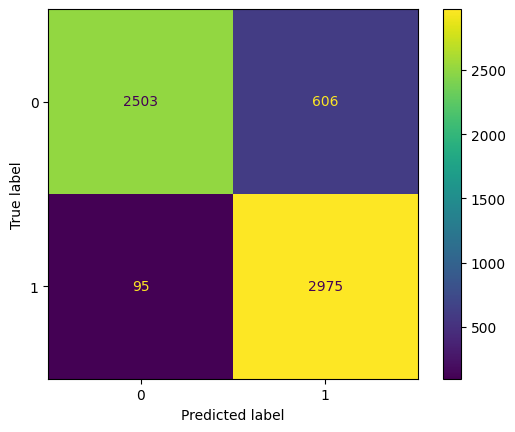

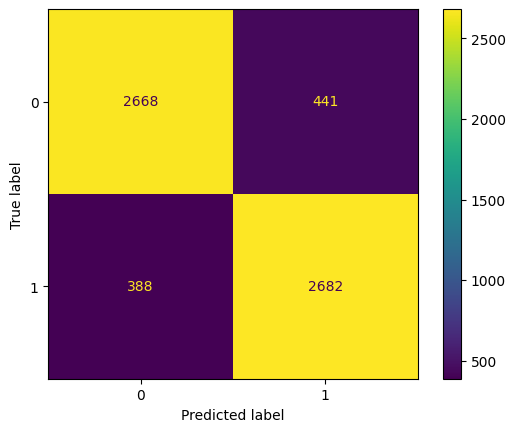

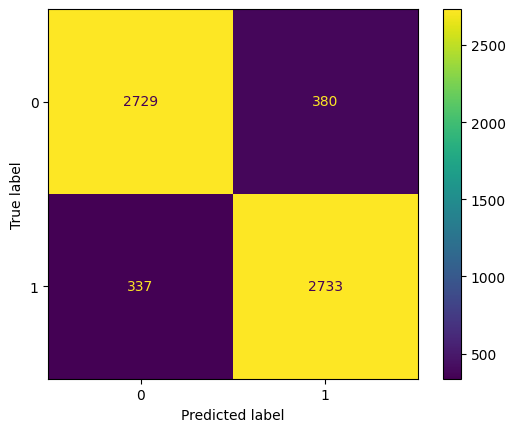

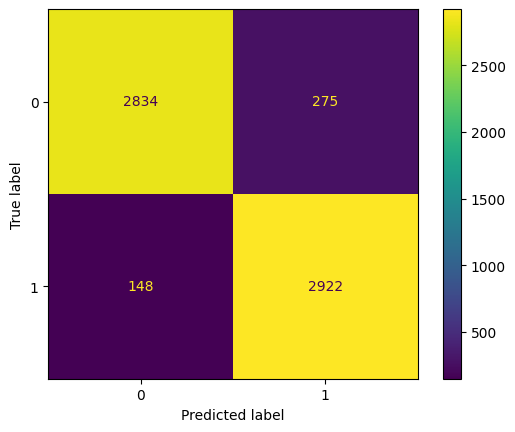

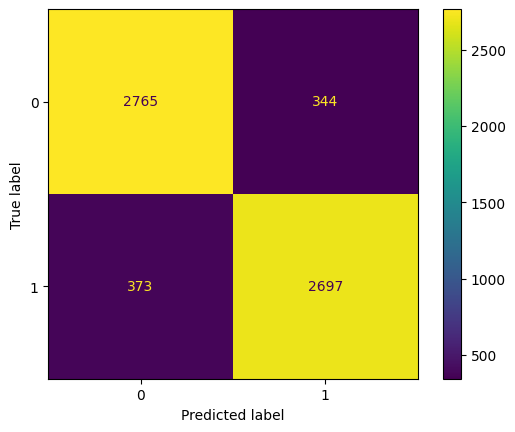

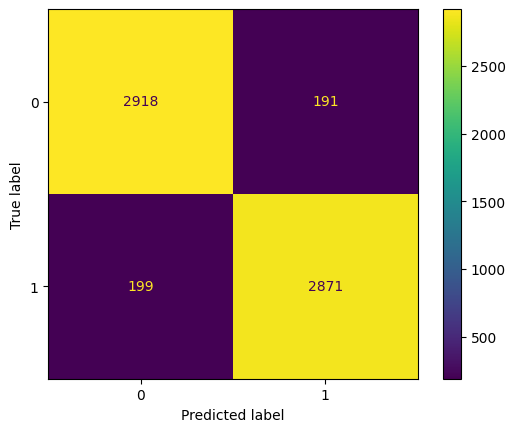

In [ ]:
acc=[]
knn_os=KNeighborsClassifier(n_neighbors=5)
sv_os=SVC()
dt_os=DecisionTreeClassifier()
rf_os=RandomForestClassifier()
ab_os=AdaBoostClassifier()
xb_os=XGBClassifier(learning_rate=0.1,max_depth=7,n_estimators=300)
models=[knn_os,sv_os,dt_os,rf_os,ab_os,xb_os]
for model in models:
  model.fit(X_train_os,y_train_os)
  y_pred_os=model.predict(X_test_os)
  print("*****************",model,"*********************")
  print("Precision_score:",precision_score(y_test_os,y_pred_os))
  print("recall_score:",recall_score(y_test_os,y_pred_os))
  print("F1_score:",f1_score(y_test_os,y_pred_os))
  print(classification_report(y_test_os,y_pred_os))
  acc.append(accuracy_score(y_test_os,y_pred_os))
  print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred_os))
  # plt.figure(figsize=(8,6))
  # RocCurveDisplay.from_estimator(model,X_test_os,y_test_os)
  # plt.title('ROC CURVE')
  # plt.show()


PERFORMANCE COMPARISON:

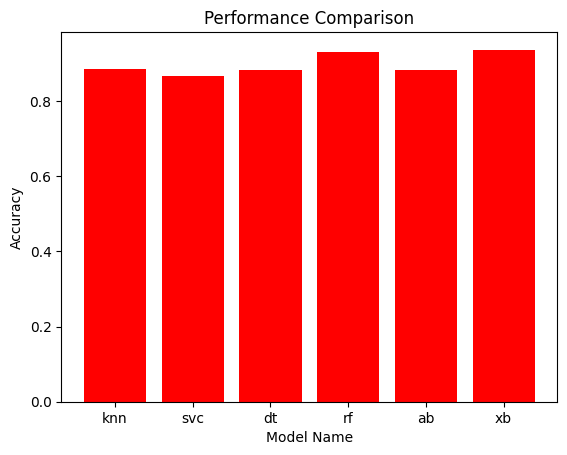

In [ ]:
model_names=['knn','svc','dt','rf','ab','xb']
plt.bar(model_names,acc,color='r')
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.title('Performance Comparison')
plt.show()

XGBOOST HAS HIGHEST PERFORMANCE

The XGBoost classifier achieved the highest accuracy of 94%, with strong precision, recall, and F1-score of 0.9358. This indicates that the model is highly effective in predicting whether an online user is likely to make a purchase (Revenue=True).

DOWNLOADING FILE USING PICKLE

In [ ]:
pickle.dump(xb_os,open('xb_model.sav','wb'))

In [ ]:
pickle.dump(scaler,open('xb_scaler.sav','wb'))